In [1]:
import keras
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [8]:
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import warnings
from skimage import exposure
# Load pickled data
import pickle

matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
the_training_file = "./traffic-signs-data/train.p"
the_testing_file = "./traffic-signs-data/test.p"

with open(the_training_file, mode='rb') as f:
    train = pickle.load(f)
with open(the_testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X, y = train['features'], train['labels']
x_train, x_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=4000, random_state=0)

x_test, y_test = test['features'], test['labels']

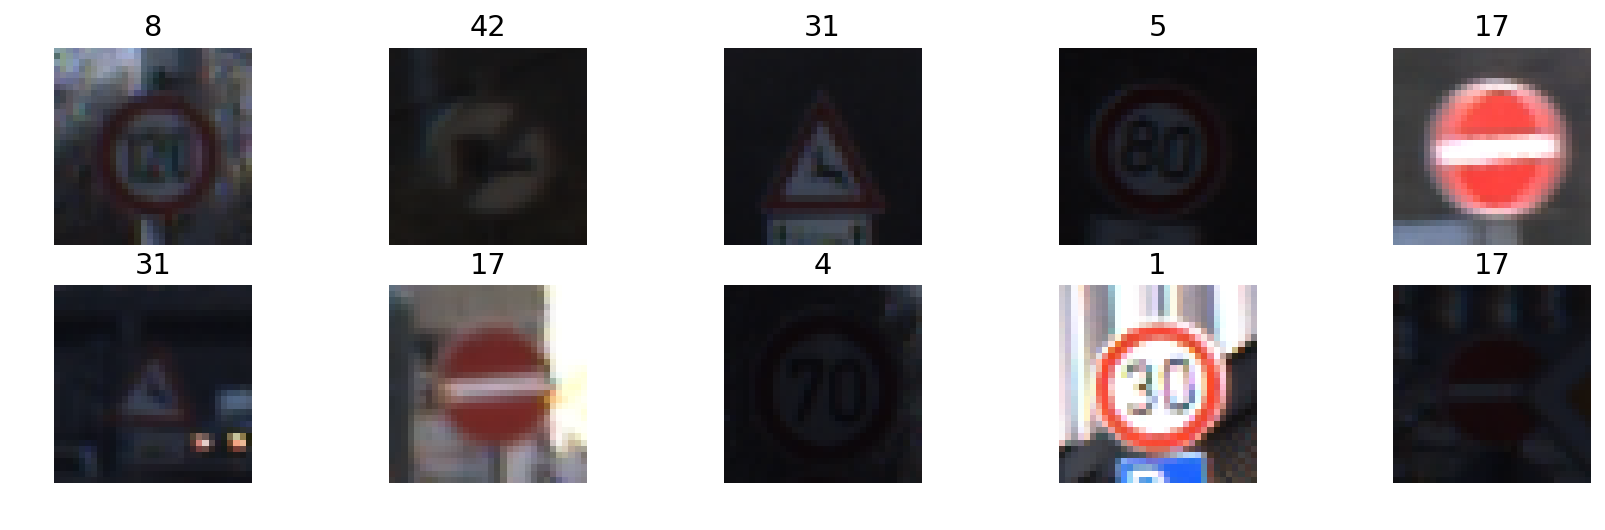

In [11]:
figure, axiss = plt.subplots(2,5, figsize=(15, 4))
figure.subplots_adjust(hspace = .2, wspace=.001)
axiss = axiss.ravel()
for i in range(10):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    axiss[i].axis('off')
    axiss[i].imshow(image)
    axiss[i].set_title(y_train[index])


In [12]:
image_rows, image_cols = 32, 32
batch_size = 256
num_classes = 43
epochs = 10

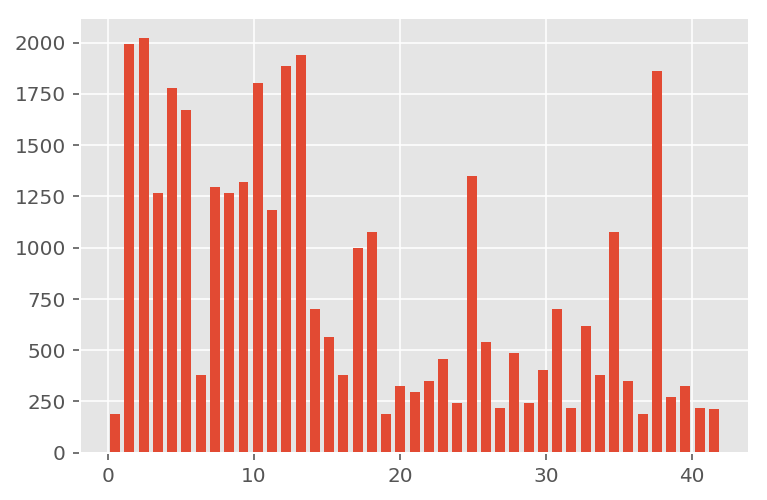

In [15]:
histogram, the_bins = np.histogram(y_train, bins=num_classes)
the_width = 0.7 * (the_bins[1] - the_bins[0])
center = (the_bins[:-1] + the_bins[1:]) / 2
plt.bar(center, histogram, align='center', width=the_width)
plt.show()

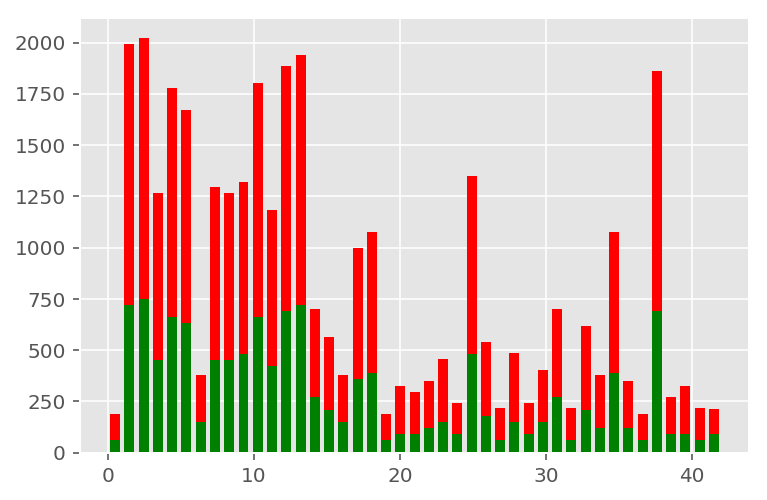

In [81]:
# Visualizing the distribution of training data and testing data
train_hist, train_bins = np.histogram(y_train, bins=num_classes)
test_hist, test_bins = np.histogram(y_test, bins=num_classes)

train_width = 0.7 * (train_bins[1] - train_bins[0])

train_center = (train_bins[:-1] + train_bins[1:]) / 2

test_width = 0.7 * (test_bins[1] - test_bins[0])

test_center = (test_bins[:-1] + test_bins[1:]) / 2

plt.bar(train_center, train_hist, align='center', color='red', width=train_width)
plt.bar(test_center, test_hist, align='center', color='green', width=test_width)
plt.show()

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (35209, 32, 32, 3)
35209 train samples
12630 test samples


In [50]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [51]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, image_rows, image_cols)
else:
    input_shape = (image_rows, image_cols, 1)

In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(16,(3,3),input_shape=(32,32,3)))

In [62]:
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [63]:
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [64]:
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

In [65]:
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 50)        20050     
_________________________________________________________________
activation_14 (Activation)   (None, 15, 15, 50)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2450)              0         
__________

In [66]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [67]:
theLeNetModel = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 35209 samples, validate on 12630 samples
Epoch 1/10
35209/35209 [==============================] - 22s 632us/step - loss: 2.2025 - acc: 0.3971 - val_loss: 1.4474 - val_acc: 0.5604
Epoch 2/10
35209/35209 [==============================] - 22s 631us/step - loss: 0.5801 - acc: 0.8291 - val_loss: 0.6247 - val_acc: 0.8179
Epoch 3/10
35209/35209 [==============================] - 22s 629us/step - loss: 0.1937 - acc: 0.9501 - val_loss: 0.4696 - val_acc: 0.8833
Epoch 4/10
35209/35209 [==============================] - 22s 623us/step - loss: 0.0956 - acc: 0.9770 - val_loss: 0.4750 - val_acc: 0.8850
Epoch 5/10
35209/35209 [==============================] - 23s 651us/step - loss: 0.0564 - acc: 0.9876 - val_loss: 0.5317 - val_acc: 0.8864
Epoch 6/10
35209/35209 [==============================] - 23s 642us/step - loss: 0.0364 - acc: 0.9925 - val_loss: 0.4336 - val_acc: 0.9140
Epoch 7/10
35209/35209 [==============================] - 22s 630us/

Text(0, 0.5, 'acc')

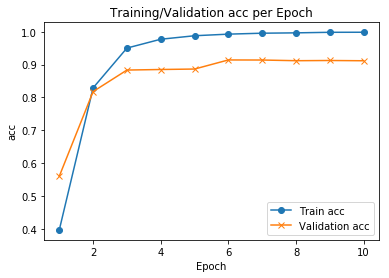

In [68]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['acc'], 'o-')
ax.plot([None] + theLeNetModel.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

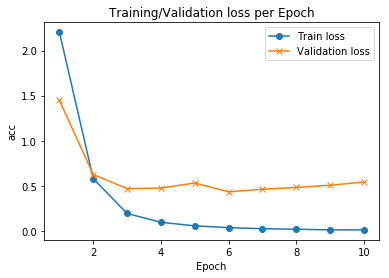

In [69]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['loss'], 'o-')
ax.plot([None] + theLeNetModel.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [85]:
#theLeNetModel.model.metrics.

In [88]:
predictions = theLeNetModel.model.predict(x_test)

In [89]:
predictions

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 4.105042e-23, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [96]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(y_test, np.argmax(predictions,axis=1))

In [111]:
confusion_matrix(y_test, np.argmax(predictions,axis=1))

In [99]:
import seaborn as sn


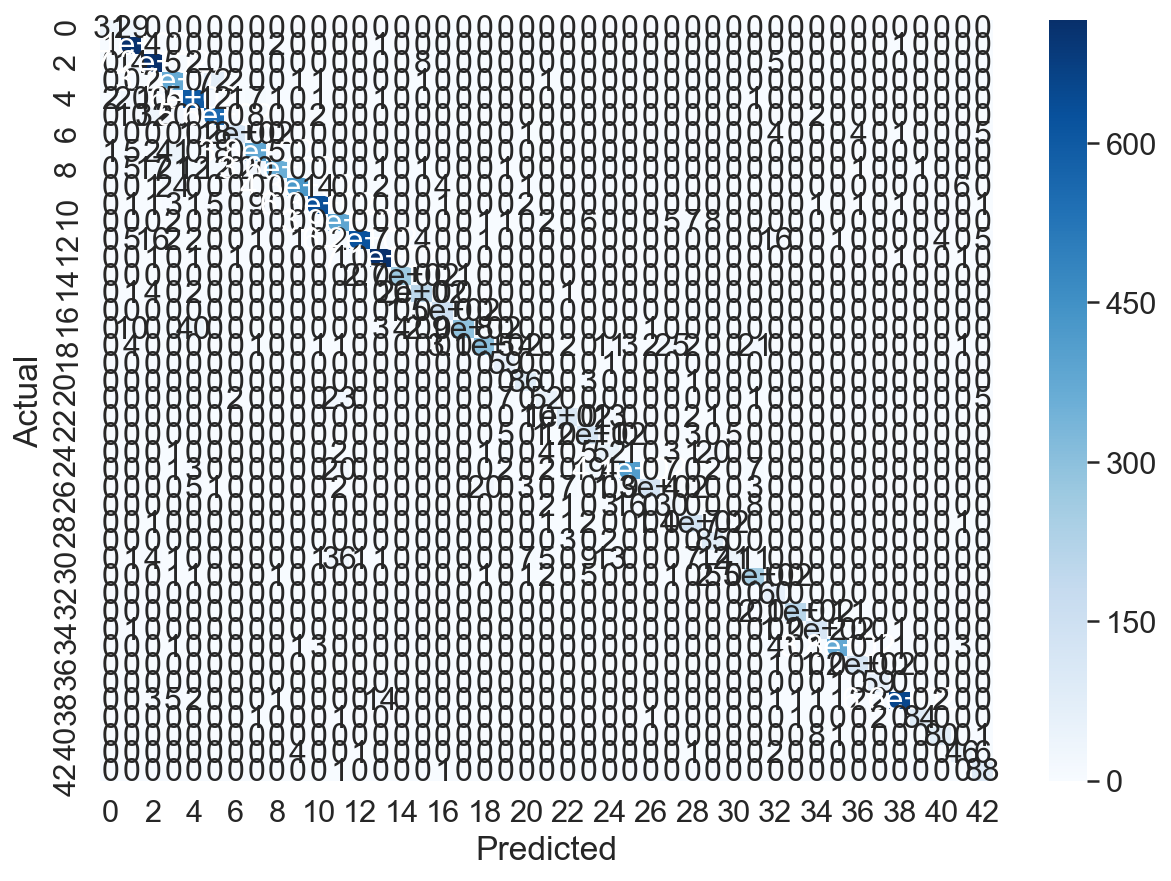

In [102]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [114]:
def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

In [110]:
type(cm)

numpy.ndarray

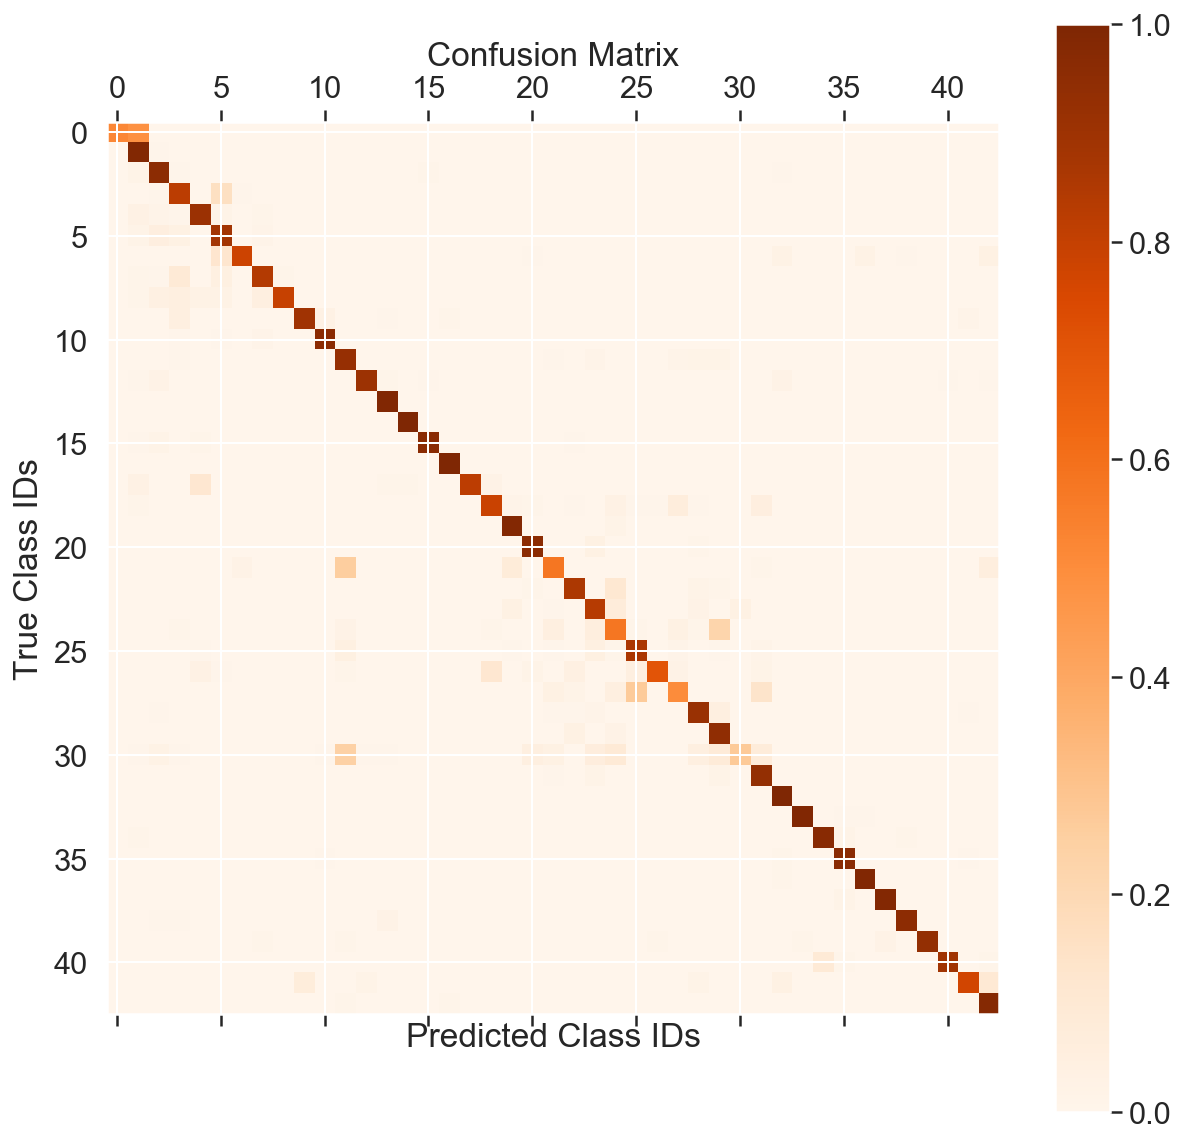

In [115]:
plot_confusion_matrix(cm)